## Assignment 3: Graph Visualization

DATA620 - Web Analytics

Daniel Dittenhafer

Data set: Pennsylvania road network
https://snap.stanford.edu/data/roadNet-PA.html

### Load the data

In [21]:
import csv
rawEdges = {}
maxEdges = 100000
cntEdge = 0

fp = open('roadNet-PA.txt', 'r')
rdr = csv.DictReader(filter(lambda row: row[0]!='#', fp), dialect=csv.excel_tab, fieldnames=["fromNode", "toNode"])
for row in rdr:
    f = row["fromNode"]
    t = row["toNode"]
    if f  not in rawEdges:
        rawEdges[f] = []
        
    rawEdges[f].append([f, t])
    
    # Limit ourselves since this dataset has 
    # many more vertices than we need for now.
    cntEdge = cntEdge + 1
    if(cntEdge >= maxEdges):
        break

# Clean up
fp.close()        

In [40]:
len(rawEdges)

33660

In [41]:
rawEdges["0"]

[['0', '1'], ['0', '6309'], ['0', '6353']]

### Build the SGraph (GraphLab)

In [42]:
def snowball_sampling(nl, root, gle, depth, max_depth, taboo_list = [], graphLabEdges = True):
    '''This function recursively walks into the network and builds the edge list. It is based on the snowball_sampling
    function described in Chapter 3 of Social Network Analysis for Startups by Maksim Tsvetovat and Alexander Kouznetsov.
    
    graphLabEdges: This parameter determines whether the eduge is a GraphLab Edge object or a simple python tuple.'''
    depth = depth + 1
    if(depth <= max_depth and root in nl):
        # have we worked on this root already?
        if(root in taboo_list):
            # Yes
            return gle
        else:
            # Not yet
            taboo_list.append(root)
            
        for f, t in nl[root]:
            if (graphLabEdges):
                gle.append(gl.Edge(f,t))
            else:
                gle.append([f,t])
            
            # Recursive function
            gle = snowball_sampling(nl, t, gle, depth, max_depth, taboo_list, graphLabEdges)
            
    return gle

In [43]:
import graphlab as gl
g = gl.SGraph()
glEdges = []
glEdges = snowball_sampling(rawEdges, "0", glEdges, 0, 4, [])

g = g.add_edges(glEdges)

In [44]:
len(glEdges)

69

#### Visualisation

In [45]:
gl.canvas.set_target('ipynb')
g.show(vlabel='id', arrows=True, highlight={"0":[0.69, 0., 0.498]})
# Does not show on GitHub rendition

### Build the Graph (networkx)

In [46]:
import networkx as nx
nx.__version__

'1.11'

In [47]:
gx = nx.Graph()
tEdges = []
tEdges = snowball_sampling(rawEdges, "0", tEdges, 0, 4, [], False)
for f,t in tEdges:
    gx.add_edge(f,t)

In [48]:
len(tEdges)

69

In [49]:
nx.write_graphml(gx, "roadsPA.graphml")

#### Visualization

In [50]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

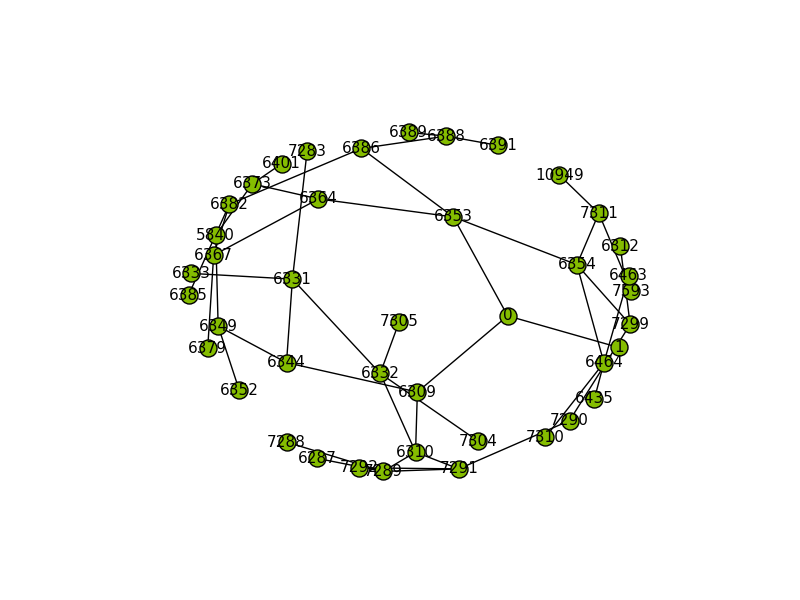

In [51]:
# Render the graph viz and save to file
f = plt.figure()
nx.draw_spring(gx, ax=f.add_subplot(111), 
               with_labels=True, 
               node_color=[0.522, 0.741, 0.], 
               node_size=150,
               font_size=11,
               ecolor=[0.37, 0.33, 0.33])
f.savefig("DATA620-Hw03-GraphViz-Dittenhafer.png")
plt.close(f)

# Load the image we just saved
from IPython.display import Image
Image(filename='DATA620-Hw03-GraphViz-Dittenhafer.png') 

### Basic Graph Analysis

#### Diameter

In [52]:
nx.diameter(gx)

8

In [53]:
nx.is_connected(gx)

True

#### Closeness Centrality of Center

In [54]:
nx.center(gx)

['0']

In [55]:
cl = nx.closeness_centrality(gx)
cl["0"]

0.3082706766917293

In [56]:
cl["1"]

0.23699421965317918

In [57]:
cl["6385"]

0.18385650224215247

### Pre-recorded Video

[Video Link](https://1drv.ms/v/s!Aq99FFkqmjPOgP9_tHk2TB9WvJZUYA)